## Proyecto Final
- Nombre: Michael Meneses
- Comisión: 61600
- Dataset: Estadísticas del universo Pokémon

### ¿ Cómo se compone este dataset ?
El siguiente dataset se compone de las estadísticas de combate de cada pokémon vigente hasta la sexta generación.

Contiene 800 registros y 13 columnas:
- **#:** Es un dato numérico que indica el número del Pokémon en la pokedex general. 
- **Name:** Es un dato categórico que indica el nombre del Pokémon.
- **Type 1:** Es un dato categórico que indica el tipo principal del Pokémon. Dicho valor se encuentra entre 18 valores únicos.
- **Type 2:** Es un dato categórico que indica el tipo secundario del Pokémon. Dicho valor se encuentra entre 18 valores únicos.
- **Total:** Es un dato numérico que se compone de la suma de HP, Attack, Defense, Sp. Atk, Sp. Def y Speed.
- **HP:** Es un dato numérico que indica el valor de vida que tiene el Pokémon.
- **Attack:** Es un dato numérico que indica el valor de ataque que tiene el Pokémon.
- **Defense:** Es un dato numérico que indica el valor de defensa que tiene el Pokémon.
- **Sp. Atk:** Es un dato numérico que indica el valor de ataque especial que tiene el Pokémon.
- **Sp. Def:** Es un dato numérico que indica el valor de defensa especial que tiene el Pokémon.
- **Speed:** Es un dato numérico que indica el valor de velocidad que tiene el Pokémon.
- **Generation:** Es un dato categórico que indica la generación a la que pertenece el Pokémon. Dicho valor se encuentre entre 6 valores únicos.
- **Legendary:** Es un dato categórico que indica si el Pokémon es legendario. Dicho valor es un booleano que identifica como True (es legendario) o False (no es legendario).


### ¿ Cuál es el objetivo de este proyecto ?

Buscaremos similitudes entre las estadísticas de cada pokémon para generar cluster de agrupación. Para conseguir esto será necesario utilizar un modelo de aprendizaje no supervisado y clusterización, ya que no contamos con datos etiquetados para el entrenamiento de los mismos.

### Comenzamos importando librerías y dataset

In [134]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Dataset
df = pd.read_csv('_pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Realizamos EDA

In [6]:
# Analizamos las columnas y el tipo de datos de cada una
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [16]:
# Obtenemos los valores estadísticos principales del dataset
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


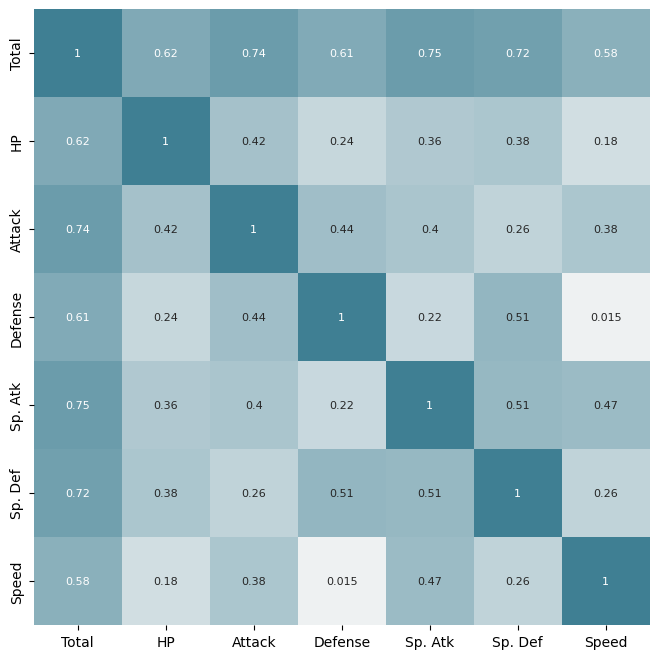

In [28]:
# Verifico la matriz de correlación sólo de las estadísticas de cada pokémon
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
corr_matrix = df[columns].corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cbar=False, annot_kws={"size": 8}, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True, ax=ax)
ax.tick_params(labelsize=10)

### Continuamos con el modelado

In [29]:
# Comienzo a preparar los datos seleccionando las características relevantes para el agrupamiento
features = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
X = df[features]

# Normalizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

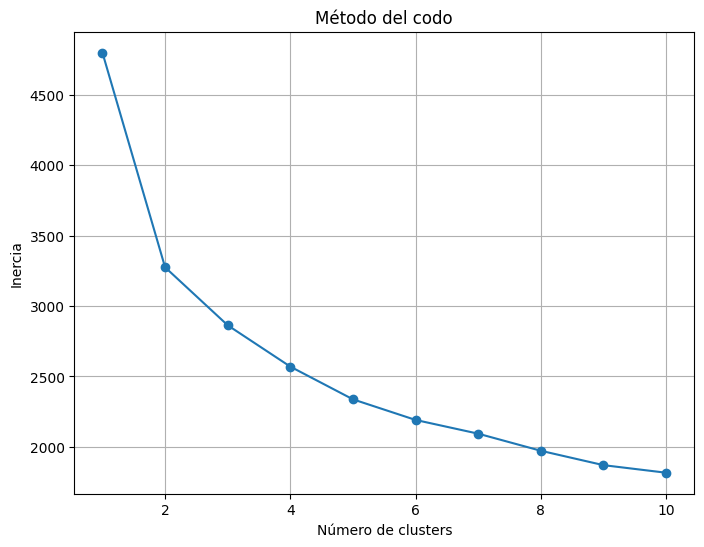

In [136]:
# Realizamos un análisis del codo para escoger el número de cluster más óptimo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=16)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Graficamos el número de cluster
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.grid(True)
plt.show()

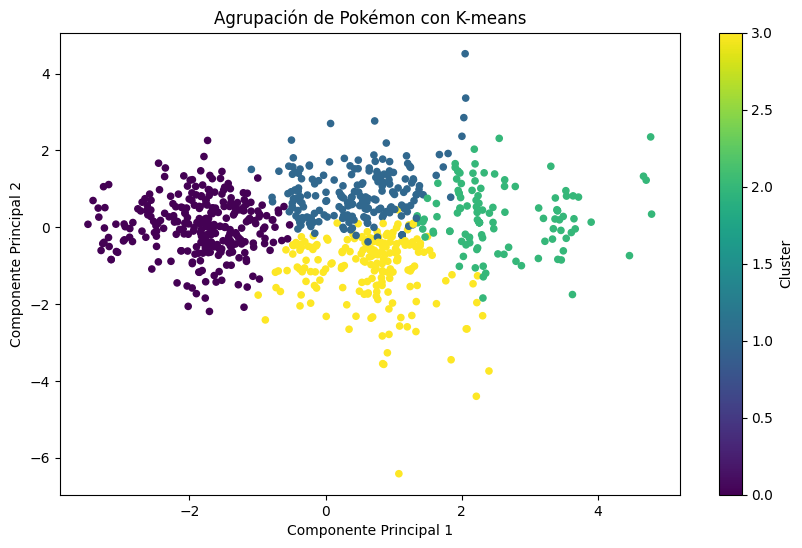

In [138]:
# Como consecuencia del análisis anterior, decidimos usar 4 cluster y guardamos la etiqueta conseguida con el modelo en la columna "Cluster"
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Usamos PCA para visualizar en 2D reduciendo dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Graficar los cluster en el plano cartesiano
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=20, marker='o')
plt.title('Agrupación de Pokémon con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

### Analicemos los resultados

Mirando el gráfico anterior, se puede reconocer los 4 grupos bien equilibrados. Ahora profundizaremos en cada uno:
* Contando cuantos pokémon tenemos en cada cluster
* Midiendo los promedios de las estadísticas de cada cluster
* Visualizando la distribucion por tipo principal en cada cluster

In [139]:
# En primer lugar contaremos cuántos Pokémon pertenecen a cada cluster
df['Cluster'].value_counts()

Cluster
0    283
1    202
3    200
2    115
Name: count, dtype: int64

In [140]:
# En segundo lugar calculamos el promedio de estadísticas por cluster
cluster_stats = df.groupby('Cluster')[features].mean()

# Agregamos la columna "Count" para incorporar lo que se hizo en el paso 1
cluster_stats['Count'] = df['Cluster'].value_counts()

cluster_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Count
Cluster,,,,,,,
0,50.113074,53.975265,51.890459,48.060071,49.212014,49.452297,283
1,69.287129,84.306931,65.910891,83.524752,73.039604,94.623762,202
2,94.304348,114.017391,94.565217,117.652174,103.686957,95.452174,115
3,81.920000,88.920000,101.000000,71.265000,84.585000,52.680000,200


In [141]:
# En tercer lugar analizamos la distribución del tipo principal por cluster
ptype_distribution = df.groupby('Cluster')['Type 1'].value_counts(normalize=True).unstack().fillna(0)
ptype_distribution.head()

Type 1,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Cluster,,,,,,,,,,,,,,,,,,
0,0.106007,0.035336,0.017668,0.042403,0.028269,0.031802,0.049470,0.003534,0.042403,0.091873,0.045936,0.031802,0.148410,0.049470,0.063604,0.045936,0.021201,0.144876
1,0.099010,0.049505,0.024752,0.108911,0.000000,0.039604,0.103960,0.004950,0.039604,0.089109,0.019802,0.019802,0.148515,0.039604,0.084158,0.019802,0.009901,0.099010
2,0.026087,0.034783,0.165217,0.043478,0.034783,0.008696,0.104348,0.017391,0.034783,0.060870,0.034783,0.034783,0.069565,0.000000,0.130435,0.043478,0.043478,0.113043
3,0.080000,0.035000,0.015000,0.025000,0.025000,0.045000,0.025000,0.000000,0.040000,0.095000,0.055000,0.035000,0.090000,0.030000,0.035000,0.110000,0.070000,0.190000


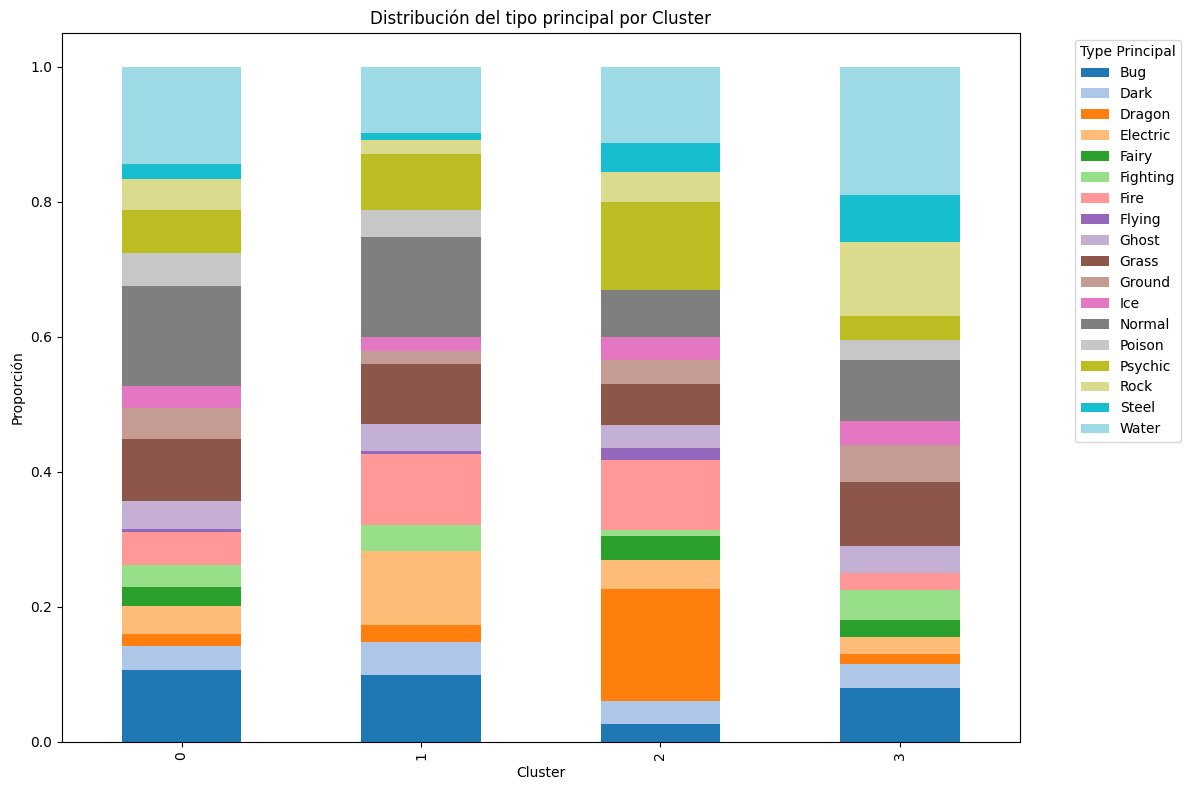

In [143]:
# Para tener una visualización más clara, creamos una gráfica de barras apiladas para conocer la composición de cada clusters
ptype_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución del tipo principal por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proporción')
plt.legend(title='Type Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ¿ Se consiguió el objetivo ?

El análisis de cada cluster nos entregó lo siguiente:
* **Cluster 0**
    * Cantidad: 283 pokémon
    * Estadísticas: Bajas en todas las categorías
    * Tipo principal: Predominan **normal**, **agua** y **bicho**
    * Conclusión: En este cluster es donde se agruparon los pokémon más débiles.
* **Cluster 1**
    * Cantidad: 202 pokémon
    * Estadísticas: Balanceadas en todas las categorías, donde las más altas son **ataque**, **ataque especial** y **velocidad**
    * Tipo principal: Predominan **normal**, **eléctrico** y **fuego**
    * Conclusión: En este cluster es donde se agruparon los pokémon más balanceados.
* **Cluster 2**
    * Cantidad: 115 pokémon
    * Estadísticas: Alto en **ataque** y **ataque especial**, además de una buena **velocidad** y **defense especial**
    * Tipo principal: Predominan **dragones** y **psíquicos**, seguidos por **agua** y **fuego**
    * Conclusión: En este cluster es donde se agruparon los pokémon más poderosos.
* **Cluster 3**
    * Cantidad: 200 pokémon
    * Estadísticas: Alto en **defensa**, seguido por **ataque** y **defensa especial**
    * Tipo principal: Predominan **agua** y **roca**
    * Conclusión: En este cluster es donde se agruparon los pokémon más defensivos.

#### Por lo cual, si conseguimos obtener una agrupación a partir de las estadísticas principales de cada pokémon =)